# Generating Medical Imaging Reports

In [243]:
import json
import pydicom
import dsuport as sp
from importlib import reload
reload(sp)
#sp.reload()
import matplotlib.pylab as plt
%matplotlib inline

## Extracting Medical image from Dicom file

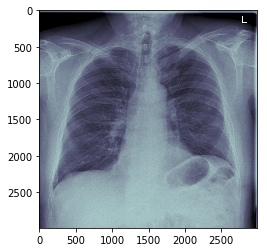

In [244]:
file_name = "CXR147_IM-0303-1001.dcm"
dicom_dataset = pydicom.dcmread(file_name)
dicom_dataset_img = sp.convert2image(dicom_dataset, file_name)
plt.imshow(dicom_dataset_img, cmap=plt.cm.bone)

## Obtain Findings from ML Model

## Updating DICOM files

In [245]:
#load selected dicom files to update dicom tags as listed below
ds = pydicom.dcmread("CXR147_IM-0303-1001.dcm") 

In [246]:
#updating values of dicom data
#Patient Name - field exists
ds.PatientName = 'Mark Aldrin'
print(ds.PatientName)
#DOB
print(ds.PatientBirthDate)

#Physician
ds.ReferringPhysicianName = 'Dr. Zeinmann'
print(ds.ReferringPhysicianName)
#Type of Imaging Study
print(ds.ImageType)
#Date Time of Study
print(ds.StudyDate,ds.StudyTime)
#Clinical History (0040,100A)	SQ	Reason for Requested Procedure Code Sequence
ds.add_new(0x00401002,'LO','not presented in dicom file')
#ds.ReasonForRequestedProcedure = 
#Comparison
#Technique
#Findings from model
fin = "The lungs are clear. Heart and pulmonary XXXX appear normal. The pleural spaces are clear and mediastinal contours are normal. Nodular density overlying the anterior left 4th rib XXXX represents a healing rib fracture."
print(fin)
#impressions from model
imp = "1. No acute cardiopulmonary disease"
print(imp)
#tags from model
tags = "normal"
#Body Part Examined
ds.BodyPartExamined = "Chest"
print(ds.BodyPartExamined)
pydicom.write_file('CXR147_IM-0303-1001.dcm',ds)

Mark Aldrin
19391114
Dr. Zeinmann
['DERIVED', 'SECONDARY', '', 'CSA RESAMPLED']
20111121 
The lungs are clear. Heart and pulmonary XXXX appear normal. The pleural spaces are clear and mediastinal contours are normal. Nodular density overlying the anterior left 4th rib XXXX represents a healing rib fracture.
1. No acute cardiopulmonary disease
Chest


# Generate Medical Image Report

In [247]:
#fin,imp,tags = take value from model
dcm_data = sp.dicom2dict(dicom_dataset,fin,imp,tags)
sp.generate_medical_report('CXR147_IM-0303-1001',dcm_data)

PAHOCH RAHA HAI YAHA FUCKKKKK
1.pdf
